# otsikko

### UFO sightings data from https://www.kaggle.com/camnugent/ufo-sightings-around-the-world

In [10]:
import pandas as pd
import numpy as np
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import folium

In [67]:
data = pd.read_csv('ufo_sighting_data.csv', low_memory=False)

#causing problems:
data.drop(data.index[43782], inplace=True)


#most common shapes are light, triangle, circle and fireball, drop others
#eggs for testing with small testset
common = ['light', 'triangle', 'circle', 'fireball', 'egg']


data = data.loc[data['UFO_shape'].isin(common)]




In [68]:
locations = []

try:
    locations = data.apply(lambda x: Point((float(x.longitude), float(x.latitude))), axis=1)
except:
    print('fail')


In [69]:
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(data, crs=crs, geometry=locations)

### All sightings mapped:

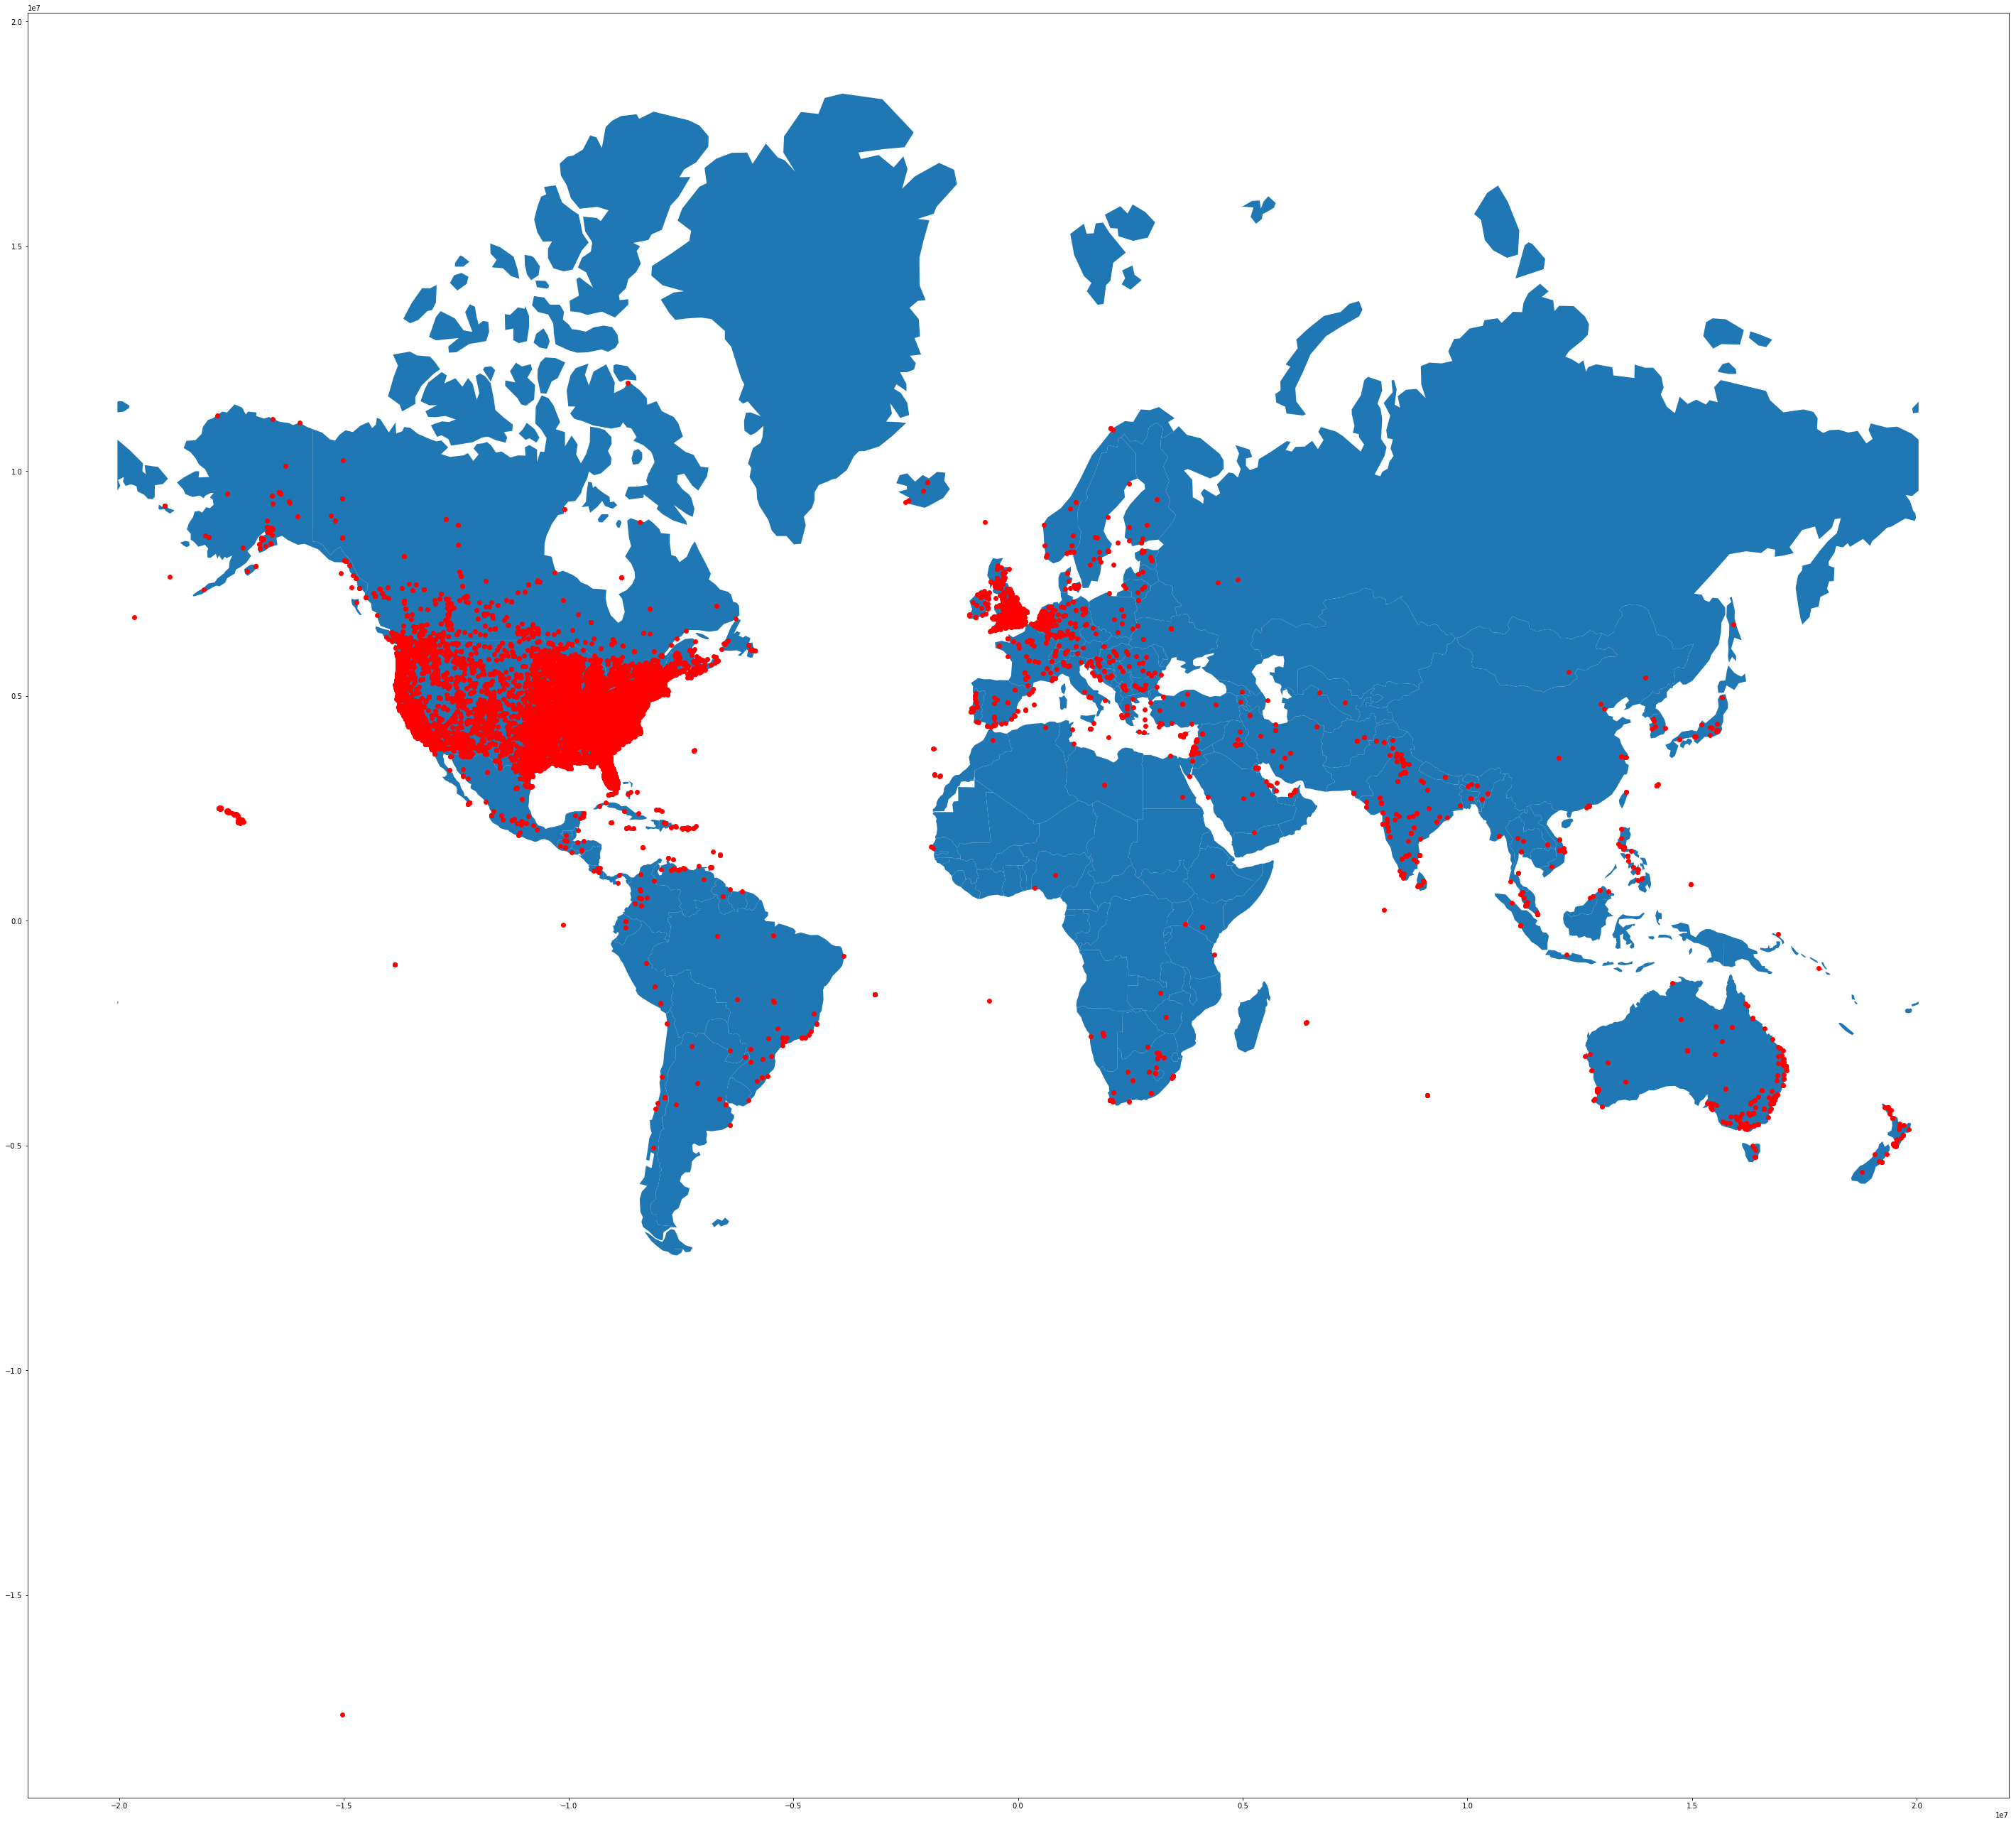

In [71]:
%matplotlib inline 

#dataframe -> geodataframe gdf
gdf = GeoDataFrame(data, crs=crs, geometry=locations)

world_m = gpd.read_file('world_m.shp')
cities = gpd.read_file('cities.shp')
base = world_m.plot(figsize=(50,50));

gdf_mercator = gdf.to_crs(epsg=3395)

gdf_mercator.plot(ax=base, marker='o', color='red', markersize=35);

### Sightings based by their shape
* light shaped: black
* triangle shaped: red
* circles: green
* fireballs: yellow

16565


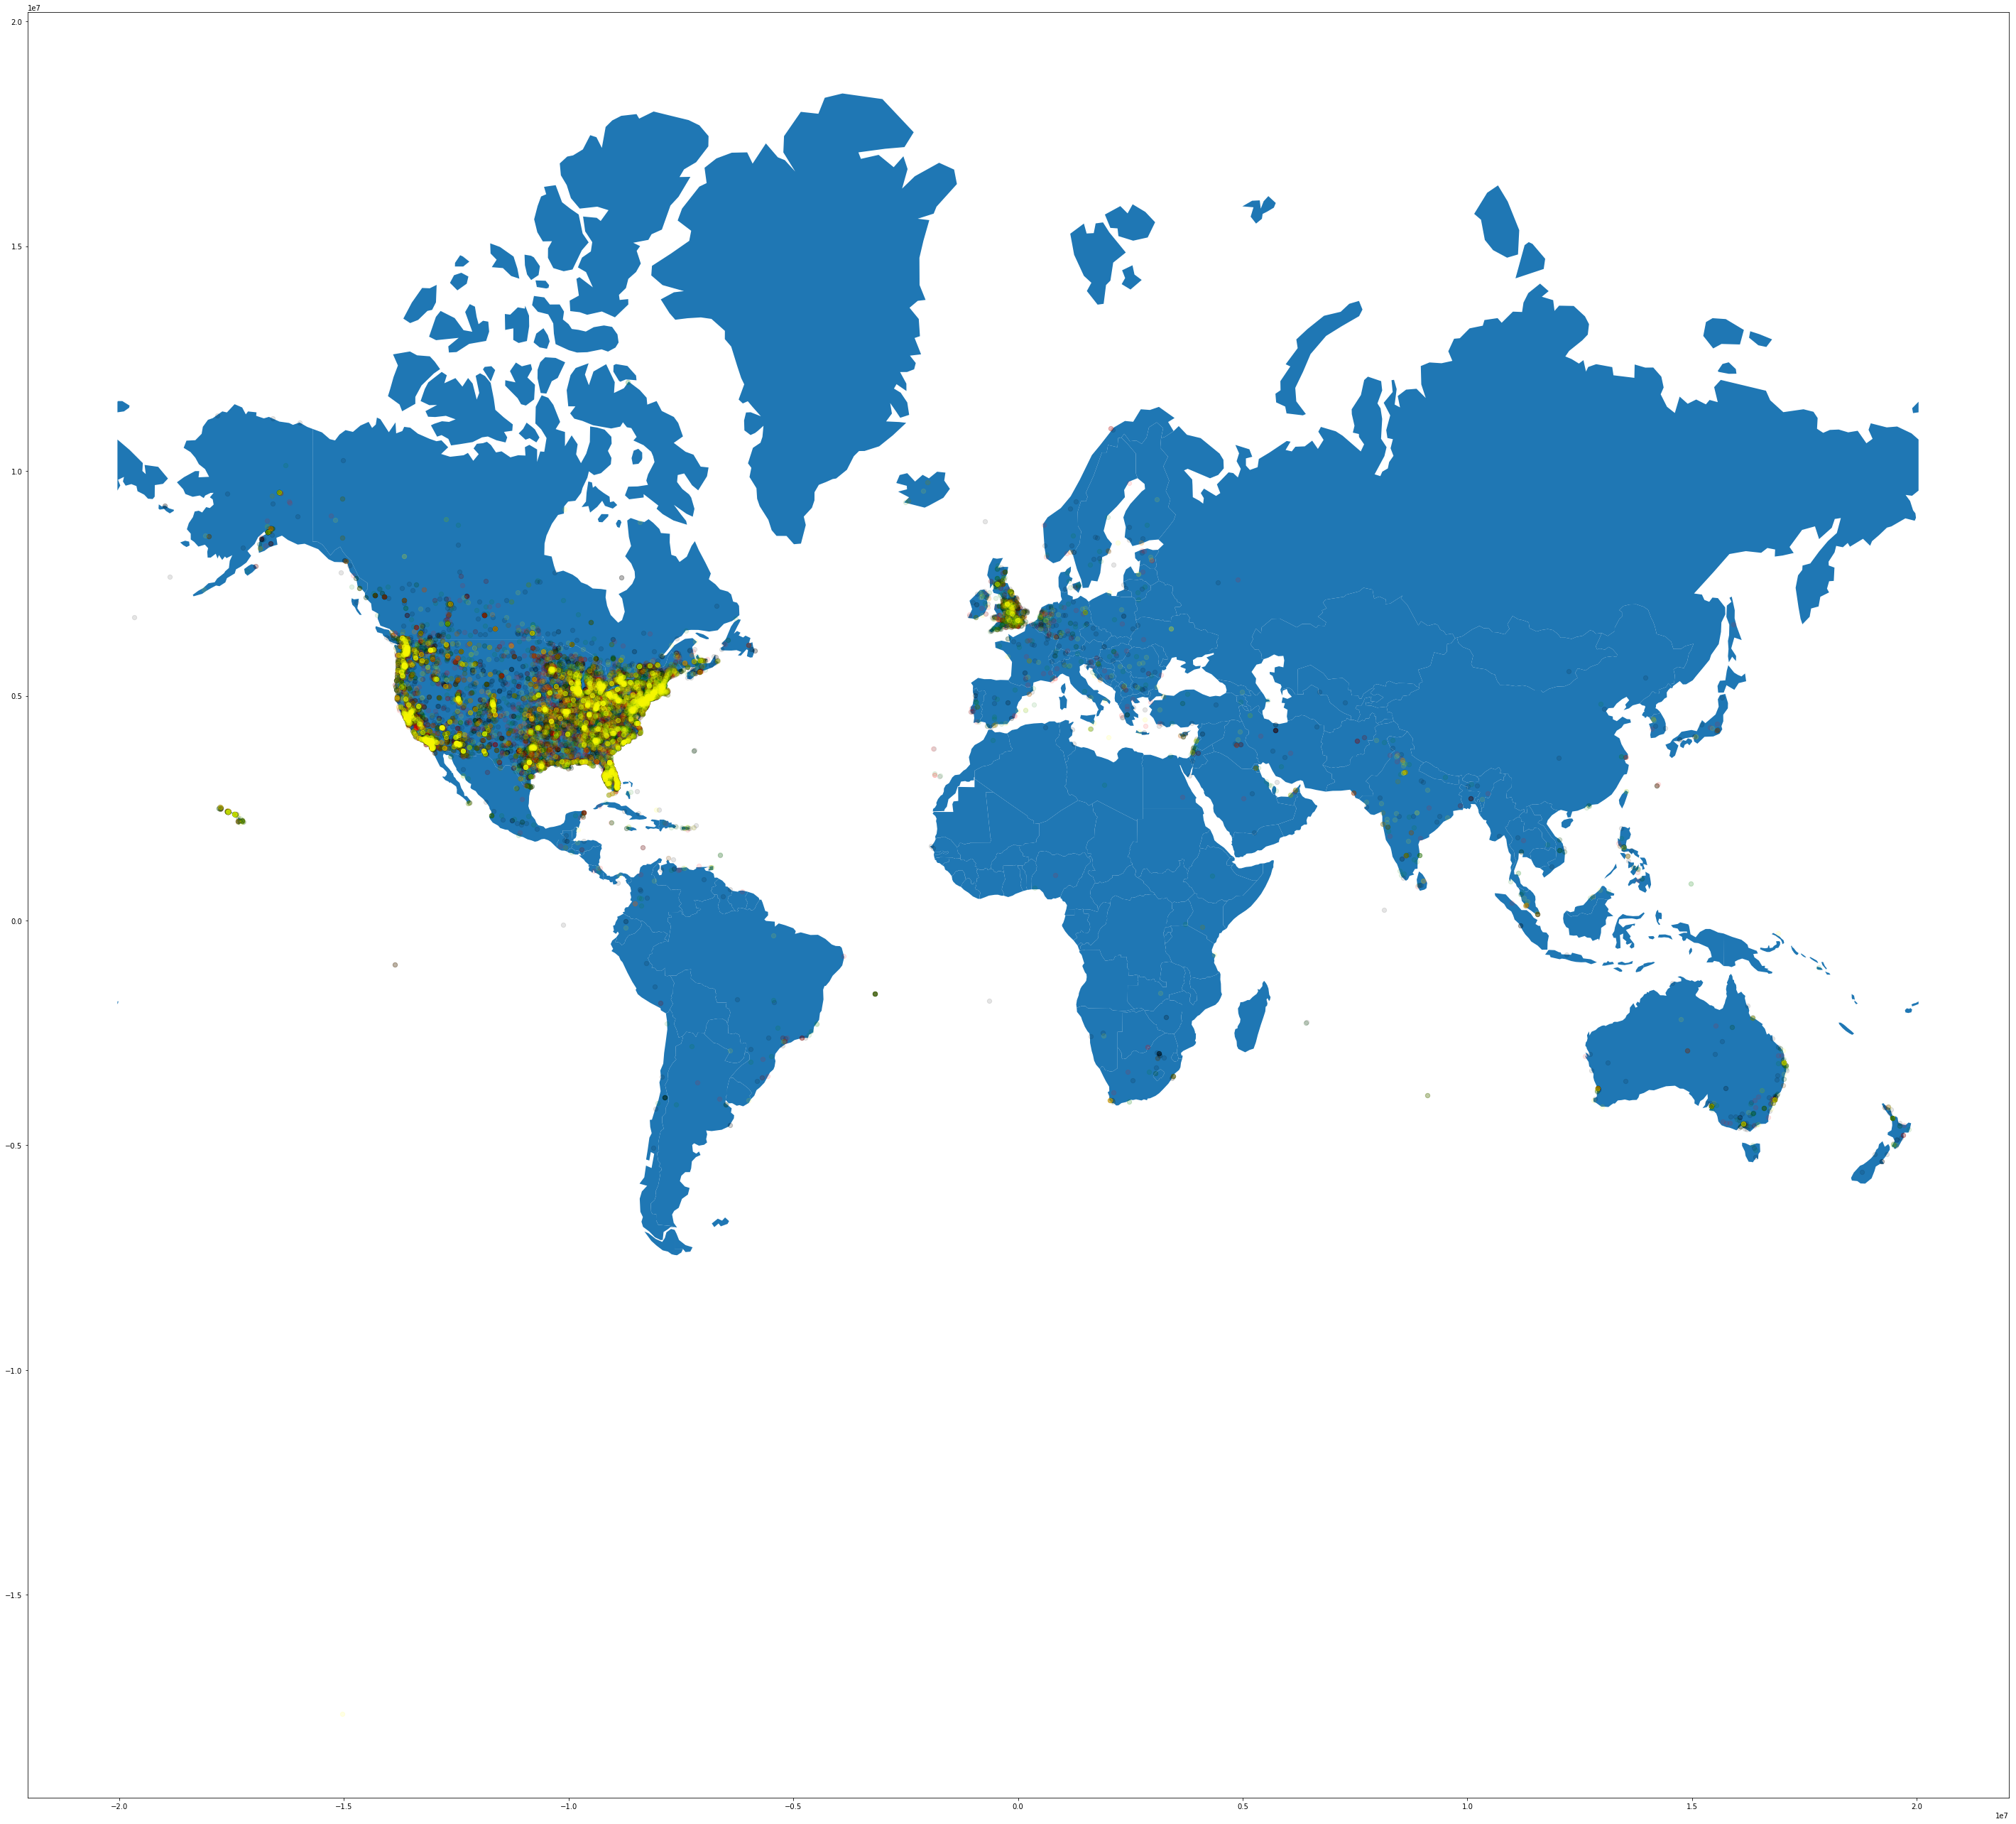

In [74]:
%matplotlib inline 

gdf['shape'] = gdf.UFO_shape

lights = gdf[gdf['shape'] == 'light']
triangles = gdf[gdf['shape'] == 'triangle']
circles = gdf[gdf['shape'] == 'circle']
fireballs = gdf[gdf['shape'] == 'fireball']



world_m = gpd.read_file('world_m.shp')
cities = gpd.read_file('cities.shp')
base = world_m.plot(figsize=(50,50))

#to mercator:
lights_mercator = lights.to_crs(epsg=3395)
triangles_mercator = triangles.to_crs(epsg=3395)
circles_mercator = circles.to_crs(epsg=3395)
fireballs_mercator = fireballs.to_crs(epsg=3395)


#cities_mercator.plot(ax=base, marker='o', color='orange', markersize=5);

lights_mercator.plot(ax=base, alpha=0.1, marker='o', color='black', markersize=40);
triangles_mercator.plot(ax=base, alpha=0.1, marker='o', color='red', markersize=40);
circles_mercator.plot(ax=base, alpha=0.1, marker='o', color='green', markersize=40)
fireballs_mercator.plot(ax=base, alpha=0.1, marker='o', color='yellow', markersize=40);


### Since most of the UFO sightings are in USA, take a closer look at those 

In [75]:
#testing with small dataset
d = gdf[gdf['shape'] == 'egg']

map=folium.Map(location=[37.687151, -103.679181],zoom_start=3,tiles='Mapbox bright')



for i,j in d.iterrows():    
    try:    
        folium.Marker([float(d['latitude'][i]),float(d['longitude'][i])],
              popup=str(d['Date_time'][i]) + ': ' + d['description'][i],
              icon=folium.Icon(color='red', icon='info-sign')
              ).add_to(map)
        
    except:
        print('Oops!')


#map